# Single photon - Figure 17

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import scipy.integrate as integrate
#from scipy.integrate import trapezoid
from scipy.optimize import curve_fit

In [154]:
rate_df_lh = pd.read_pickle('triggerless_lonehit_fits_12072021.pkl')
rate_df_lh

{'lonehit_fits': {'amp': 1742.8774118960314,
  'amp_err': 10.084017083070938,
  'gamma': -0.7404914185993964,
  'gamma_err': 0.0014382624250114402,
  'bin_centers_fit': [0.002116991726768609,
   0.002375303785038961,
   0.0026651346813870184,
   0.002990330295716417,
   0.003355205776252066,
   0.0037646027989353633,
   0.004223953813522304,
   0.00473935412889118,
   0.005317642794088108,
   0.005966493348352711,
   0.006694515644321655,
   0.0075113700955421,
   0.00842789586429014,
   0.00945625469066873,
   0.01061009227150982,
   0.011904719330480658,
   0.013357314782084607,
   0.01498715368541934,
   0.016815863012500185,
   0.018867708625039017,
   0.021169917267686106,
   0.02375303785038961,
   0.026651346813870186,
   0.02990330295716417,
   0.03355205776252068,
   0.03764602798935365,
   0.04223953813522304,
   0.047393541288911795,
   0.05317642794088108,
   0.05966493348352714,
   0.06694515644321658,
   0.07511370095542101,
   0.08427895864290141,
   0.0945625469066873,


[ 1.74287741e+03 -7.40491419e-01]


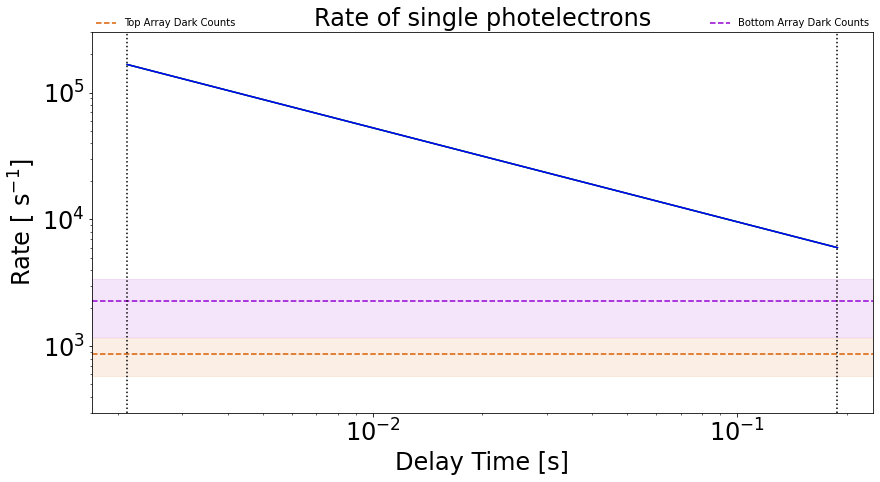

In [155]:
def power(x, a, b):
    return a * x ** b

fig = plt.figure(figsize=(14, 7))

curvey1 = power(rate_df_lh['lonehit_fits']['bin_centers_fit'], 
                rate_df_lh['lonehit_fits']['amp'],rate_df_lh['lonehit_fits']['gamma'])

pars, errors = curve_fit(power, rate_df_lh['lonehit_fits']['bin_centers_fit'], curvey1)
print(pars)

plt.plot(rate_df_lh['lonehit_fits']['bin_centers_fit'], curvey1)
rate_func = power(rate_df_lh['lonehit_fits']['bin_centers_fit'], pars[0], pars[1])
plt.plot(rate_df_lh['lonehit_fits']['bin_centers_fit'], rate_func, color='green')
plt.plot(rate_df_lh['lonehit_fits']['bin_centers_fit'], curvey1, color='blue')
plt.axhline(8.9*98, color='#d95f02', linestyle='dashed',label='Top Array Dark Counts')
plt.axhspan((8.9-3)*98, (8.9+3)*98, color='#d95f02', alpha=0.1)
plt.axhline(20.7*110, color='darkviolet', linestyle='dashed', label='Bottom Array Dark Counts')
plt.axhspan((20.7-10)*110, (20.7+10)*110, color='darkviolet', alpha=0.1)

plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][0], color='k', linestyle=':')
plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][-1], color='k', linestyle=':')

plt.legend(bbox_to_anchor=(0,1,1,0.1),  loc="lower left", #title='Position Correlated',
           borderaxespad=0, ncol=2 , frameon=False, mode='expand', numpoints=1)

plt.ylim(3e2, 3e5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Delay Time [s]',fontsize=24)
plt.ylabel('Rate [ s$^{-1} $]',fontsize=24)
plt.title('Rate of single photelectrons',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [156]:
dark_top = 8.9*98
dark_bottom = 20.7*110
min_t = rate_df_lh['lonehit_fits']['bin_centers_fit'][0]
max_t = rate_df_lh['lonehit_fits']['bin_centers_fit'][-1]
print(min_t)
print(max_t)

net_rate = rate_func - (dark_top + dark_bottom)
result = integrate.quad(power, min_t, max_t, args =(1.74287741e+03, -7.40491419e-01))
print(result)
time_range = max_t-min_t
darkcounts = dark_top*time_range + dark_bottom*time_range
print(darkcounts)
result = result - darkcounts

print(f"The total photoelectron count is {result[0]} photoelectrons.")

0.002116991726768609
0.1886770862503902
(2998.026491681241, 2.5370439919840393e-05)
587.5150496737891
The total photoelectron count is 2410.511442007452 photoelectrons.


# Single electron - Figure 5

In [157]:
rate_df = pd.read_hdf('triggerless_fit_feb_df_DMbins.h5')

In [158]:
rate_df

,amplitude,amp_err,gamma,gamma_err,bin_centers_fit
se_correlated,4.01352e-07,2.18477e-09,-1.10289,0.00123242,"[0.002128543751124949, 0.0023609271219319538, ..."
de_correlated,7.25175e-09,1.41402e-10,-1.26345,0.00416571,"[0.002128543751124949, 0.0023609271219319538, ..."
fe_correlated,1.77348e-10,1.16289e-11,-1.50507,0.0131362,"[0.002128543751124949, 0.0023609271219319538, ..."
se_uncorrelated,3.39887e-08,4.00108e-10,-0.743356,0.00296974,"[0.002128543751124949, 0.0023609271219319538, ..."
de_uncorrelated,9.88865e-10,4.23231e-11,-0.820783,0.0103844,"[0.002128543751124949, 0.0023609271219319538, ..."
fe_uncorrelated,1.17606e-09,1.16117e-10,-0.372434,0.027378,"[0.002128543751124949, 0.0023609271219319538, ..."


In [159]:
rate_df['bin_centers_fit']['fe_correlated'][-1]

0.18326628709701548

No handles with labels found to put in legend.
No handles with labels found to put in legend.


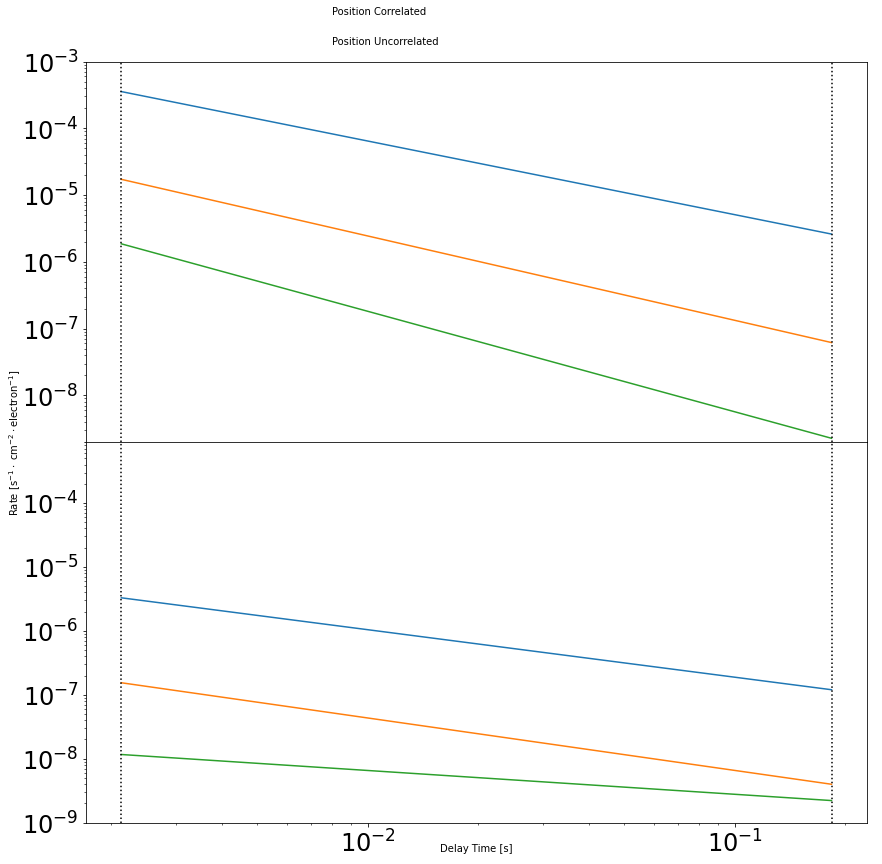

In [160]:
def power(x, a, b):
    return a * x ** b

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)

# single electron correlated

curvey1 = power(rate_df['bin_centers_fit']['se_correlated'], 
                rate_df['amplitude']['se_correlated'],rate_df['gamma']['se_correlated'])

ax1.plot(rate_df['bin_centers_fit']['se_correlated'], curvey1)

# double electron correlated

curvey1 = power(rate_df['bin_centers_fit']['de_correlated'], 
                rate_df['amplitude']['de_correlated'],rate_df['gamma']['de_correlated'])

ax1.plot(rate_df['bin_centers_fit']['de_correlated'], curvey1)

# few electron correlated

curvey1 = power(rate_df['bin_centers_fit']['fe_correlated'], 
                rate_df['amplitude']['fe_correlated'],rate_df['gamma']['fe_correlated'])

ax1.plot(rate_df['bin_centers_fit']['fe_correlated'], curvey1)
ax1.axvline(rate_df['bin_centers_fit']['fe_correlated'][0], color='k', linestyle=':')
ax1.axvline(rate_df['bin_centers_fit']['fe_correlated'][-1], color='k', linestyle=':')

# single electron uncorrelated

curvey1 = power(rate_df['bin_centers_fit']['se_uncorrelated'], 
                rate_df['amplitude']['se_uncorrelated'],rate_df['gamma']['se_uncorrelated'])
ax2.plot(rate_df['bin_centers_fit']['se_uncorrelated'], curvey1)

# double electron uncorrelated

curvey1 = power(rate_df['bin_centers_fit']['de_uncorrelated'], 
                rate_df['amplitude']['de_uncorrelated'],rate_df['gamma']['de_uncorrelated'])
ax2.plot(rate_df['bin_centers_fit']['de_uncorrelated'], curvey1)

# few electron uncorrelated

curvey1 = power(rate_df['bin_centers_fit']['fe_uncorrelated'], 
                rate_df['amplitude']['fe_uncorrelated'],rate_df['gamma']['fe_uncorrelated'])

ax2.plot(rate_df['bin_centers_fit']['fe_uncorrelated'], curvey1)
ax2.axvline(rate_df['bin_centers_fit']['fe_uncorrelated'][0], color='k', linestyle=':')
ax2.axvline(rate_df['bin_centers_fit']['fe_uncorrelated'][-1], color='k', linestyle=':')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(2e-9, 1e-3)
ax1.tick_params(labelsize=24)
ax1.legend(bbox_to_anchor=(0.4,1.1,0.6,0.1),  loc="lower left",
           borderaxespad=0, ncol=3, frameon=False, mode='expand')
ax1.text(8e-3, 5.1e-3, 'Position Correlated')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(1e-9, 9e-4)
ax2.tick_params(labelsize=24)
ax2.legend(bbox_to_anchor=(0.4,2,0.6,0.1), loc="lower left",
           borderaxespad=0, ncol=4, frameon=False, mode='expand')
ax1.text(8e-3, 1.8e-3, 'Position Uncorrelated')

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_ylabel('Rate [s$^{-1} \cdot$ cm$^{-2} \cdot $electron$^{-1} $]',labelpad=40)
ax.set_xlabel('Delay Time [s]')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [161]:
curvey1 = power(rate_df['bin_centers_fit']['se_correlated'], 
                rate_df['amplitude']['se_correlated'],rate_df['gamma']['se_correlated'])
print(curvey1[0])
print(curvey1[-1])

0.00035511503578095684
2.60776025566465e-06


No handles with labels found to put in legend.


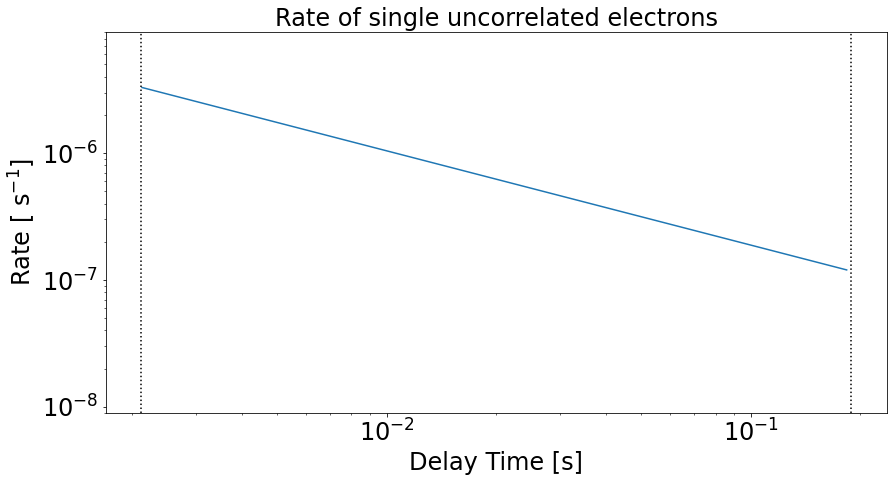

In [162]:
fig = plt.figure(figsize=(14, 7))

curvey1 = power(rate_df['bin_centers_fit']['se_uncorrelated'], 
                rate_df['amplitude']['se_uncorrelated'],rate_df['gamma']['se_uncorrelated'])
plt.plot(rate_df['bin_centers_fit']['se_uncorrelated'], curvey1)

plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][0], color='k', linestyle=':')
plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][-1], color='k', linestyle=':')

plt.legend(bbox_to_anchor=(0,1,1,0.1),  loc="lower left", #title='Position Correlated',
           borderaxespad=0, ncol=2 , frameon=False, mode='expand', numpoints=1)

plt.ylim(9e-9, 9e-6)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Delay Time [s]',fontsize=24)
plt.ylabel('Rate [ s$^{-1} $]',fontsize=24)
plt.title('Rate of single uncorrelated electrons',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [163]:
curvey1[-1]

1.1998488924652327e-07

No handles with labels found to put in legend.


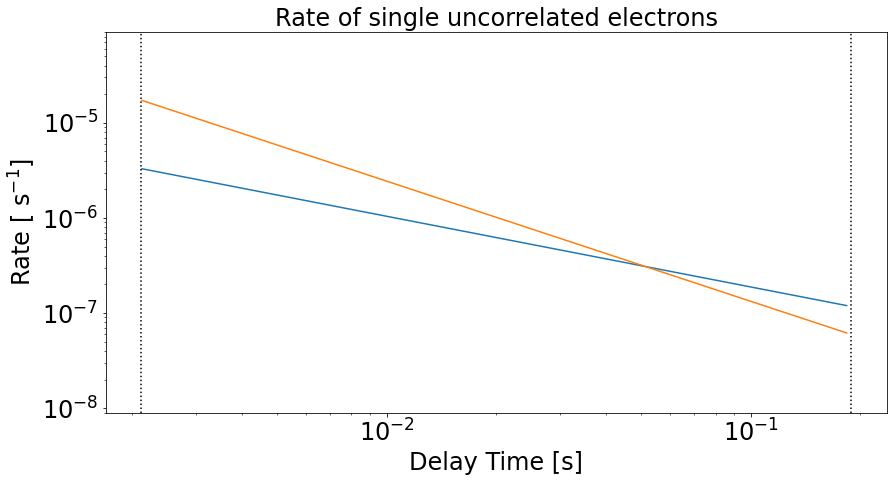

In [164]:
fig = plt.figure(figsize=(14, 7))

curvey1 = power(rate_df['bin_centers_fit']['se_uncorrelated'], 
                rate_df['amplitude']['se_uncorrelated'],rate_df['gamma']['se_uncorrelated'])
plt.plot(rate_df['bin_centers_fit']['se_uncorrelated'], curvey1)

curvey1 = power(rate_df['bin_centers_fit']['de_correlated'], 
                rate_df['amplitude']['de_correlated'],rate_df['gamma']['de_correlated'])

plt.plot(rate_df['bin_centers_fit']['de_correlated'], curvey1)

plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][0], color='k', linestyle=':')
plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][-1], color='k', linestyle=':')

plt.legend(bbox_to_anchor=(0,1,1,0.1),  loc="lower left", #title='Position Correlated',
           borderaxespad=0, ncol=2 , frameon=False, mode='expand', numpoints=1)

plt.ylim(9e-9, 9e-5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Delay Time [s]',fontsize=24)
plt.ylabel('Rate [ s$^{-1} $]',fontsize=24)
plt.title('Rate of single uncorrelated electrons',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

Uncorrelated Integral

In [165]:
min_t = rate_df['bin_centers_fit']['se_uncorrelated'][0]
max_t = rate_df['bin_centers_fit']['se_uncorrelated'][-1]
print(min_t)
print(max_t)

curvey1 = power(rate_df['bin_centers_fit']['se_uncorrelated'], 
                rate_df['amplitude']['se_uncorrelated'],rate_df['gamma']['se_uncorrelated'])
pars_uncorr, errors_uncorr = curve_fit(power, rate_df['bin_centers_fit']['se_uncorrelated'], curvey1)
print(f"Parameters: {pars_uncorr}")
rate_func = power(rate_df_lh['lonehit_fits']['bin_centers_fit'], pars_uncorr[0], pars_uncorr[1])

result = integrate.quad(power, min_t, max_t, args =(pars_uncorr[0], pars_uncorr[1]))

print(f"The total single uncorrelated electron count is {result[0]} electrons.")

0.002128543751124949
0.18326628709701548
Parameters: [ 3.39886735e-08 -7.43356481e-01]
The total single uncorrelated electron count is 5.837295387130384e-08 electrons.


Correlated Integral

In [167]:
min_t = rate_df['bin_centers_fit']['se_correlated'][0]
max_t = rate_df['bin_centers_fit']['se_correlated'][-1]
print(min_t)
print(max_t)

curvey1 = power(rate_df['bin_centers_fit']['se_correlated'], 
                rate_df['amplitude']['se_correlated'],rate_df['gamma']['se_correlated'])
pars_corr, errors_corr = curve_fit(power, rate_df['bin_centers_fit']['se_correlated'], curvey1)
print(f"Parameters: {pars_corr}")
rate_func = power(rate_df_lh['lonehit_fits']['bin_centers_fit'], pars_corr[0], pars_corr[1])

result = integrate.quad(power, min_t, max_t, args =(pars_corr[0], pars_corr[1]))

print(f"The total single correlated electron count is {result[0]} electrons.")

0.002128543751124949
0.18326628709701548
Parameters: [ 4.01351867e-07 -1.10289478e+00]
The total single correlated electron count is 2.701432970663347e-06 electrons.


# Single electron - Figure 2

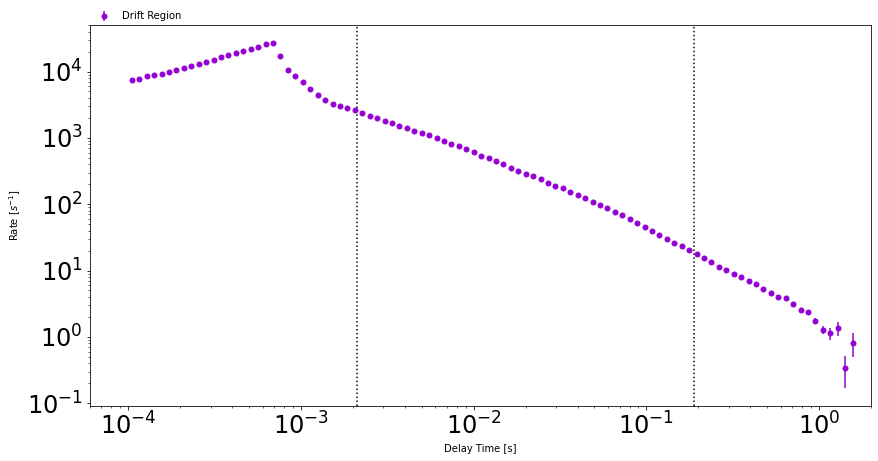

In [143]:
fig = plt.figure(figsize=(14, 7))


liquid = pd.read_pickle('liquid_200ms.hdf5')


type_dict = {'liquid':'darkviolet', 'gas':'#1b9e77', 'cathode':'#d95f02'}

plt.errorbar(liquid['rate_all']['bin_centers'],liquid['rate_all']['rate'], 
             yerr=liquid['rate_all']['rate_err'],color=type_dict['liquid'], 
             ecolor =type_dict['liquid'] ,fmt='.' ,markersize=10,drawstyle = 'steps-mid', label='Drift Region', zorder=2)


plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][0], color='k', linestyle=':')
plt.axvline(rate_df_lh['lonehit_fits']['bin_centers_fit'][-1], color='k', linestyle=':')

plt.xlim(6e-5,2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Delay Time [s]')
plt.ylabel('Rate [$ s^{-1} $]')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(bbox_to_anchor=(0,1,1,0.1), loc="lower left", mode="expand", borderaxespad=0, ncol=3, frameon=False)

plt.show()

In [144]:
delay_time_range = liquid['rate_all']['bin_centers'][99] - liquid['rate_all']['bin_centers'][0]
bin_size = delay_time_range/100
print(bin_size)
area_sum = 0

for i in range(99):
    bin_area = bin_size*liquid['rate_all']['rate'][i]
    area_sum = area_sum + bin_area

print(f"The total count is {area_sum} single electrons.")

0.0190560591508133
The total count is 7509.257040285982 single electrons.


In [145]:
df_se = pd.DataFrame(liquid['rate_all'])
df_se

,rate,rate_err,bin_centers
0,7521.181106,144.211415,0.000105
1,7694.820677,139.473367,0.000116
2,8519.887738,140.929105,0.000128
3,8758.949603,136.883973,0.000142
4,9282.879513,135.354139,0.000156
...,...,...,...
95,1.352576,0.305277,1.282377
96,0.343530,0.175850,1.415879
97,0.821861,0.329790,1.563279
98,0.000000,NaN,1.726024


In [146]:
df_se = df_se[df_se['bin_centers']>rate_df_lh['lonehit_fits']['bin_centers_fit'][0]]
df_se = df_se[df_se['bin_centers']<rate_df_lh['lonehit_fits']['bin_centers_fit'][-1]].reset_index(drop=True)
df_se

,rate,rate_err,bin_centers
0,2366.631497,20.851372,0.002267
1,2165.826024,19.027091,0.002502
2,1982.210268,17.363220,0.002763
3,1818.130101,15.872099,0.003051
4,1675.227288,14.552779,0.003368
5,1529.280811,13.265591,0.003719
6,1400.426297,12.114446,0.004106
7,1281.997681,11.064411,0.004533
8,1191.474924,10.209250,0.005005
9,1089.735509,9.316079,0.005526


In [147]:
np.sum((df_se['bin_centers'][1:].values-df_se['bin_centers'][:-1].values)*(df_se['rate'][1:].values+df_se['rate'][:-1].values)/2)

23.635954950582082

In [148]:
df_se['bin_centers'][1:].values

array([0.00250246, 0.00276298, 0.00305062, 0.0033682 , 0.00371885,
       0.004106  , 0.00453345, 0.0050054 , 0.00552649, 0.00610182,
       0.00673705, 0.00743841, 0.00821279, 0.00906778, 0.01001178,
       0.01105405, 0.01220483, 0.01347541, 0.01487827, 0.01642717,
       0.01813731, 0.0200255 , 0.02211025, 0.02441203, 0.02695344,
       0.02975942, 0.03285752, 0.03627814, 0.04005487, 0.04422478,
       0.04882879, 0.0539121 , 0.05952461, 0.06572141, 0.07256332,
       0.08011751, 0.08845813, 0.09766705, 0.10783466, 0.11906077,
       0.13145556, 0.14514072, 0.16025056, 0.17693342])

In [149]:
df_se['bin_centers'][:-1]

0     0.002267
1     0.002502
2     0.002763
3     0.003051
4     0.003368
5     0.003719
6     0.004106
7     0.004533
8     0.005005
9     0.005526
10    0.006102
11    0.006737
12    0.007438
13    0.008213
14    0.009068
15    0.010012
16    0.011054
17    0.012205
18    0.013475
19    0.014878
20    0.016427
21    0.018137
22    0.020025
23    0.022110
24    0.024412
25    0.026953
26    0.029759
27    0.032858
28    0.036278
29    0.040055
30    0.044225
31    0.048829
32    0.053912
33    0.059525
34    0.065721
35    0.072563
36    0.080118
37    0.088458
38    0.097667
39    0.107835
40    0.119061
41    0.131456
42    0.145141
43    0.160251
Name: bin_centers, dtype: float64